In [1]:
def addLabels(x, y):
    for i in range(len(y)):
        plt.text(i, y[i], y[i], ha="center")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('children anemia.csv')

In [4]:
df = df.drop(['Anemia level'], axis=1)

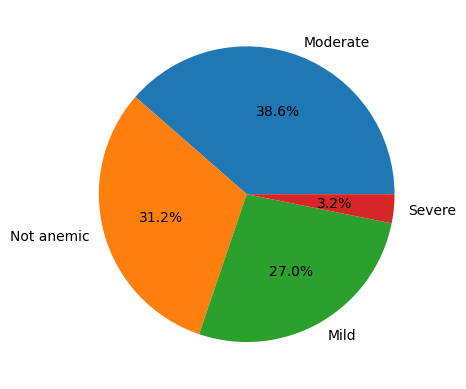

In [5]:
plt.pie(df["Anemia level.1"].value_counts().values, labels=df["Anemia level.1"].value_counts().index, autopct="%1.1f%%")
plt.show()

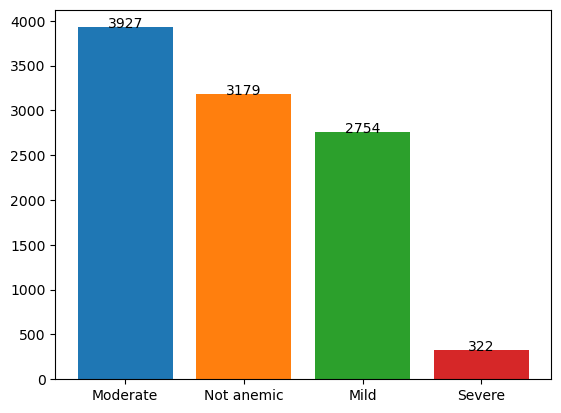

In [6]:
plt.bar(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addLabels(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values)

In [7]:
df.shape

(33924, 16)

In [8]:
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [9]:
df.isna().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                                                 12756
Had fever in last two weeks                         

# Filling NAN values with 0 or Unknown

In [10]:
df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].fillna(df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].mean())
df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].fillna(df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].mean())
df['When child put to breast'] = df['When child put to breast'].fillna("Unknown")

In [11]:
df = df[df["Anemia level.1"].notna()]
df = df[df["Currently residing with husband/partner"].notna()]

In [12]:
df = df.reset_index()

In [13]:
df = df.drop(["index"], axis=1)

In [14]:
df.isna().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
When child put to breast                                                 0
Had fever in last two weeks                                              0
Hemoglobin level adjusted

In [15]:
df.shape

(9664, 16)

# One Hot Encoding

In [16]:
listToChange = []
for i in df.columns:
    if isinstance(df[i][0], str):
        if i != "Anemia level.1" and i != "Anemia level":
            listToChange.append(i)
df = pd.get_dummies(df, columns=listToChange, dtype=int)

In [17]:
df.shape

(9664, 75)

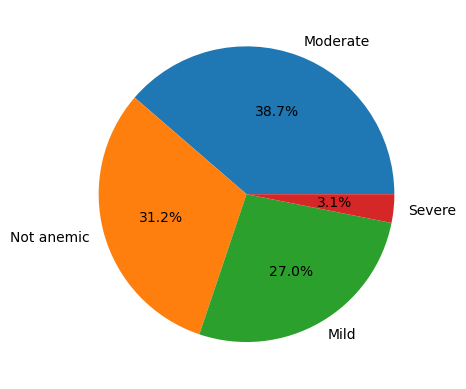

In [18]:
plt.pie(df["Anemia level.1"].value_counts().values, labels=df["Anemia level.1"].value_counts().index, autopct="%1.1f%%")
plt.show()

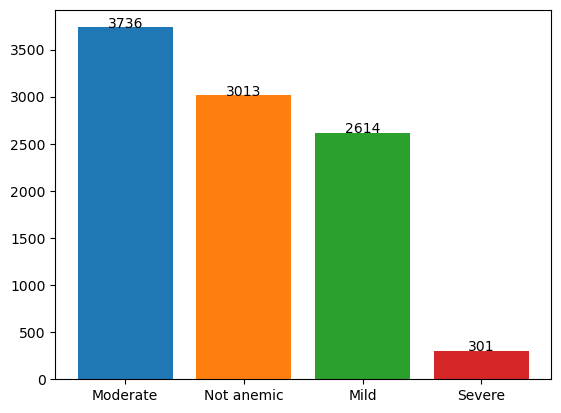

In [19]:
plt.bar(df["Anemia level.1"].value_counts().index, df["Anemia level.1"].value_counts().values, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addLabels(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values)

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [21]:
X = df.drop(["Anemia level.1"], axis=1)
y = pd.DataFrame(df["Anemia level.1"])

In [22]:
le = LabelEncoder()
y["Anemia level.1"] = le.fit_transform(y["Anemia level.1"])

<Axes: >

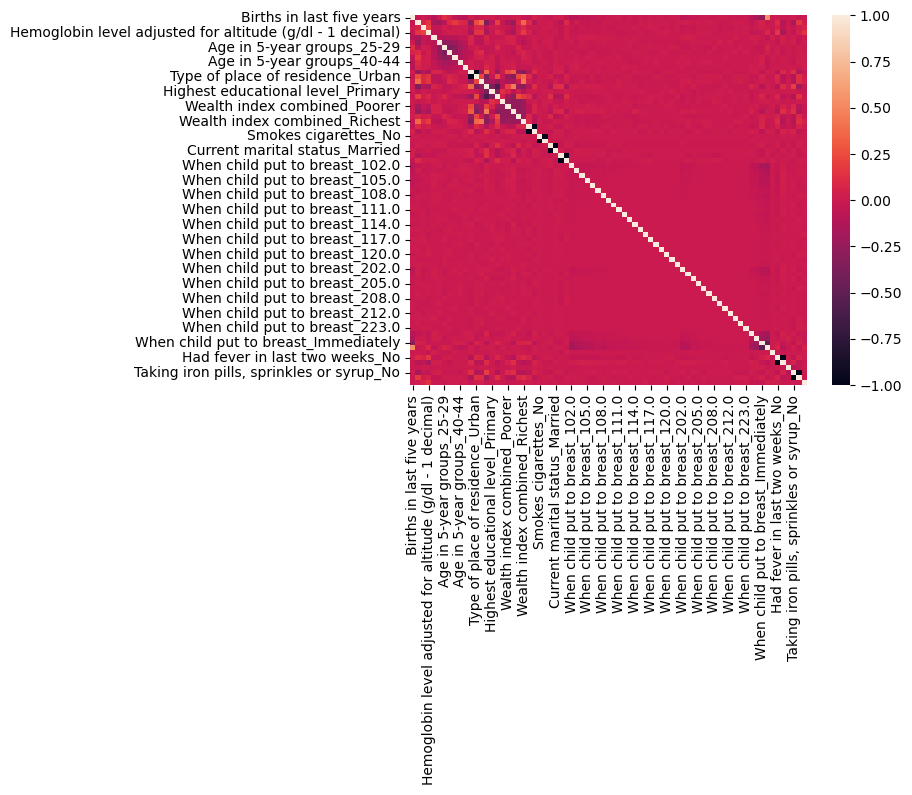

In [23]:
sns.heatmap(pd.concat([X,y], axis=1).corr())

<BarContainer object of 74 artists>

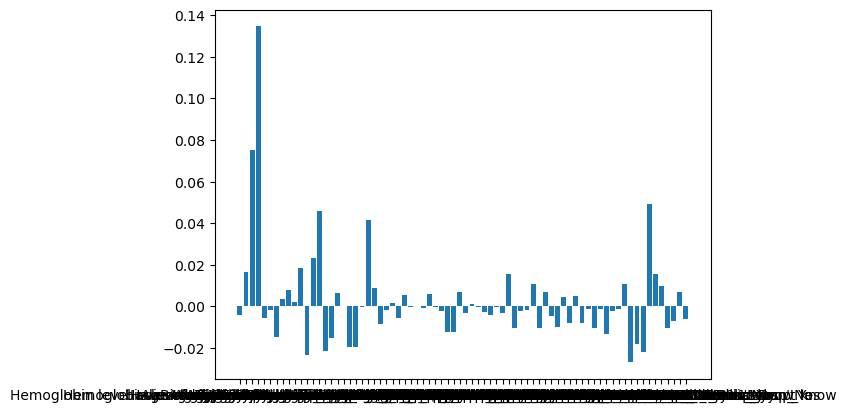

In [24]:
plt.bar(pd.concat([X,y], axis=1).corr()['Anemia level.1'].index[:-1], pd.concat([X,y], axis=1).corr()['Anemia level.1'].values[:-1])

In [25]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()
rr = RandomForestClassifier()
gnb = GaussianNB()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=420)

In [27]:
knn.fit(X_train, y_train)
knn.score(X_val, y_val) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


97.56854630108639

In [28]:
dt.fit(X_train, y_train)
dt.score(X_val, y_val) * 100

100.0

In [29]:
svm.fit(X_train, y_train)
svm.score(X_val, y_val) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


98.13760993274703

In [30]:
rr.fit(X_train, y_train)
rr.score(X_val, y_val) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


98.13760993274703

In [31]:
gnb.fit(X_train, y_train)
gnb.score(X_val, y_val) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13.55406104500776

In [32]:
print("KNN Test Score:", knn.score(X_test, y_test))
print("DT Test Score:", dt.score(X_test, y_test))
print("SVM Test Score:", svm.score(X_test, y_test))
print("RR Test Score:", rr.score(X_test, y_test))
print("GNB Test Score:", gnb.score(X_test, y_test))

KNN Test Score: 0.9725814795654423
DT Test Score: 1.0
SVM Test Score: 0.9860320744956027
RR Test Score: 0.9865494050698397
GNB Test Score: 0.12829798241076049


In [33]:
import warnings

In [34]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("KNN:", cross_val_score(knn, X, y).mean())
    print("DT:", cross_val_score(dt, X, y).mean())
    print("SVM:", cross_val_score(svm, X, y).mean())
    print("RR:", cross_val_score(rr, X, y).mean())
    print("GNB:", cross_val_score(gnb, X, y).mean())

KNN: 0.9740265241704769
DT: 1.0
SVM: 0.9800282550321912
RR: 0.9823043488971648
GNB: 0.1257354823438181


In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)

In [37]:
pca_X = pca.fit_transform(X)

In [38]:
pca_X.shape

(9664, 2)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=420)

In [40]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


98.55147439213657

In [41]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test) * 100

97.56854630108639

In [42]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


99.43093636833937

In [43]:
rr.fit(X_train, y_train)
rr.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


98.2410760475944

In [44]:
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


88.87739265390586

In [45]:
from mpl_toolkits import mplot3d

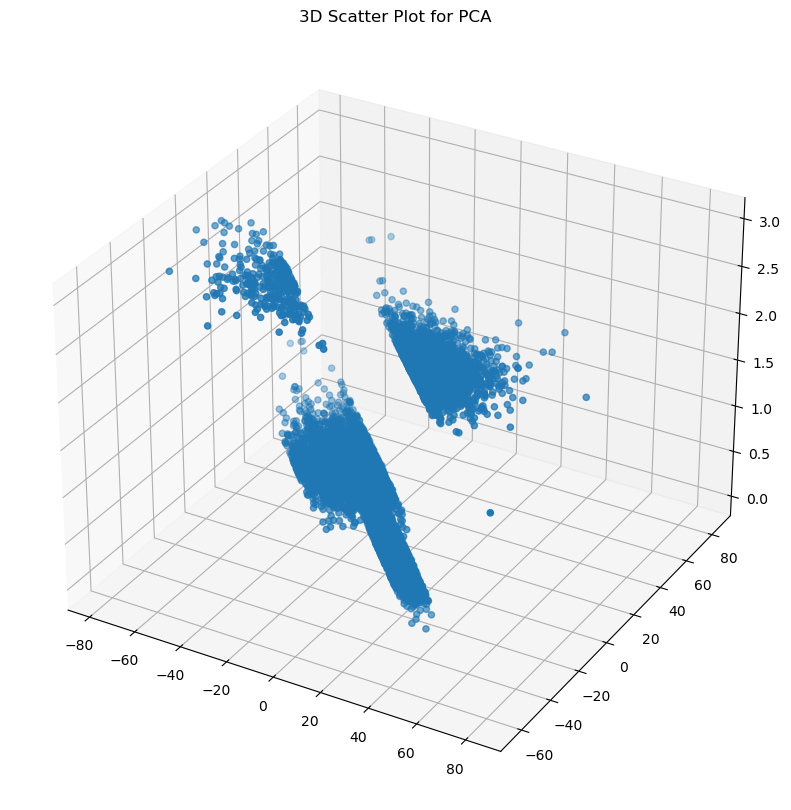

In [46]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

ax.scatter(pca_X[:, 0], pca_X[:, 1], y)
plt.title("3D Scatter Plot for PCA")
plt.show()

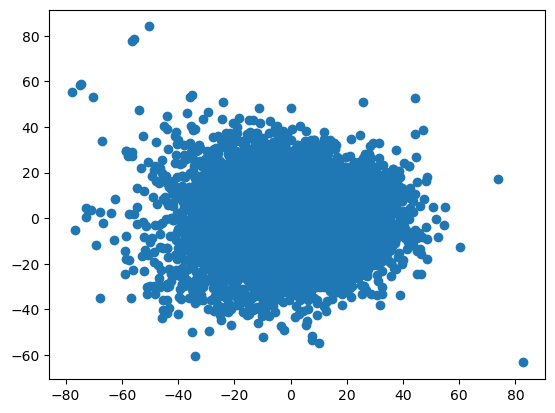

In [47]:
plt.scatter(pca_X[:, 0], pca_X[:, 1])

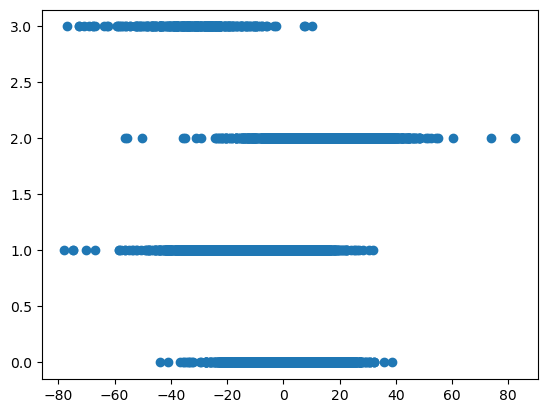

In [48]:
plt.scatter(pca_X[:, 0], y)

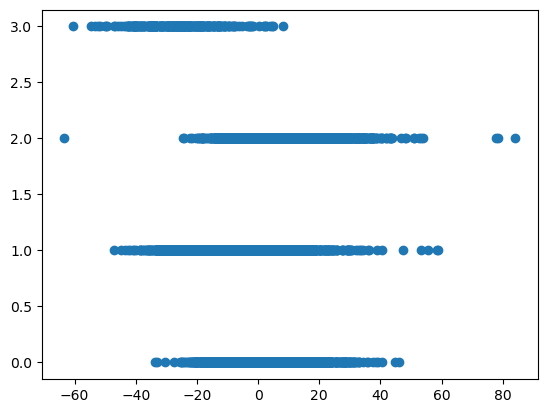

In [49]:
plt.scatter(pca_X[:, 1], y)

In [50]:
import umap

C:\Users\swast\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
ump = umap.UMAP(n_components=2, random_state=42)

In [52]:
umap_X = ump.fit_transform(X)

C:\Users\swast\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [53]:
umap_X.shape

(9664, 2)

In [54]:
X_train,X_test, y_train, y_test = train_test_split(umap_X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=420)

In [55]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


96.7408173823073

In [56]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test) * 100

96.58561821003622

In [57]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


96.32695292291774

In [58]:
rr.fit(X_train, y_train)
rr.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


97.15468184169684

In [59]:
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


85.77340920848422

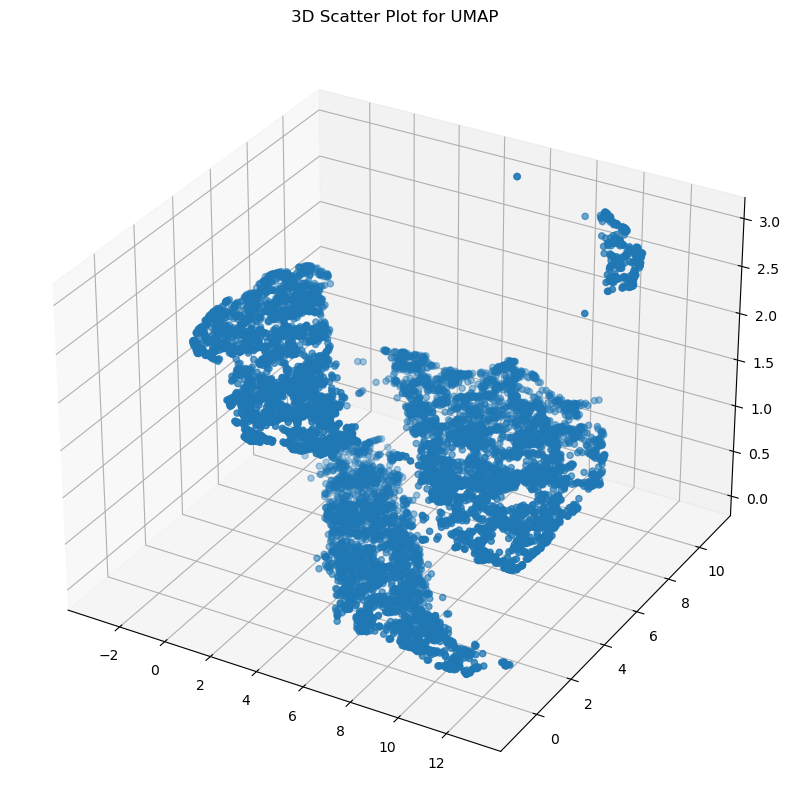

In [60]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

ax.scatter(umap_X[:, 0], umap_X[:, 1], y)
plt.title("3D Scatter Plot for UMAP")
plt.show()

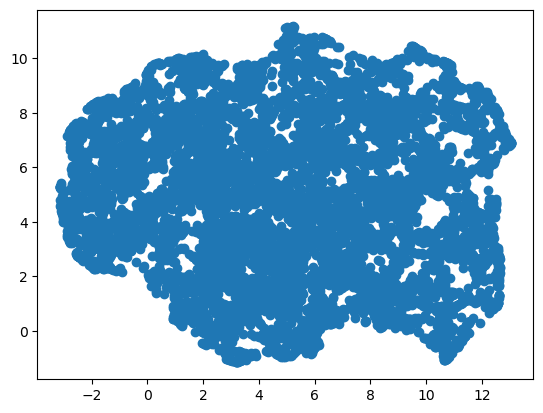

In [61]:
plt.scatter(umap_X[:, 0], umap_X[:, 1])

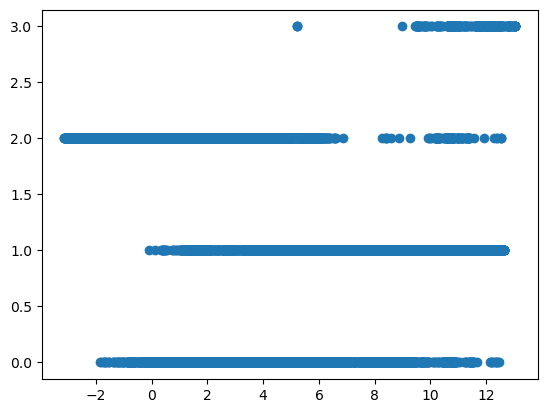

In [62]:
plt.scatter(umap_X[:, 0], y)

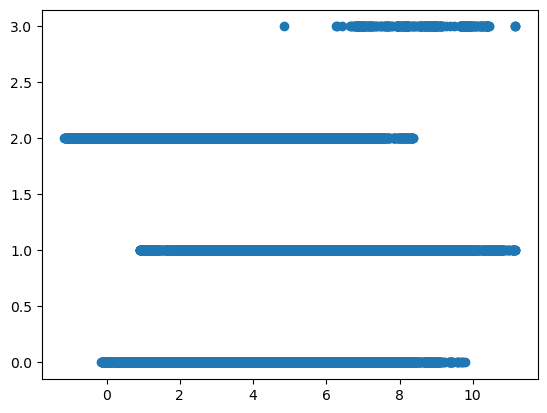

In [63]:
plt.scatter(umap_X[:, 1], y)

In [64]:
from sklearn.manifold import TSNE

In [65]:
tsne = TSNE()

In [66]:
tsne_X = tsne.fit_transform(X)

In [67]:
X_train,X_test, y_train, y_test = train_test_split(tsne_X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=420)

In [68]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


96.17175375064666

In [69]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test) * 100

95.65442317640974

In [70]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


94.51629591308847

In [71]:
rr.fit(X_train, y_train)
rr.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


96.32695292291774

In [72]:
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test) * 100

C:\Users\swast\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


88.92912571132953

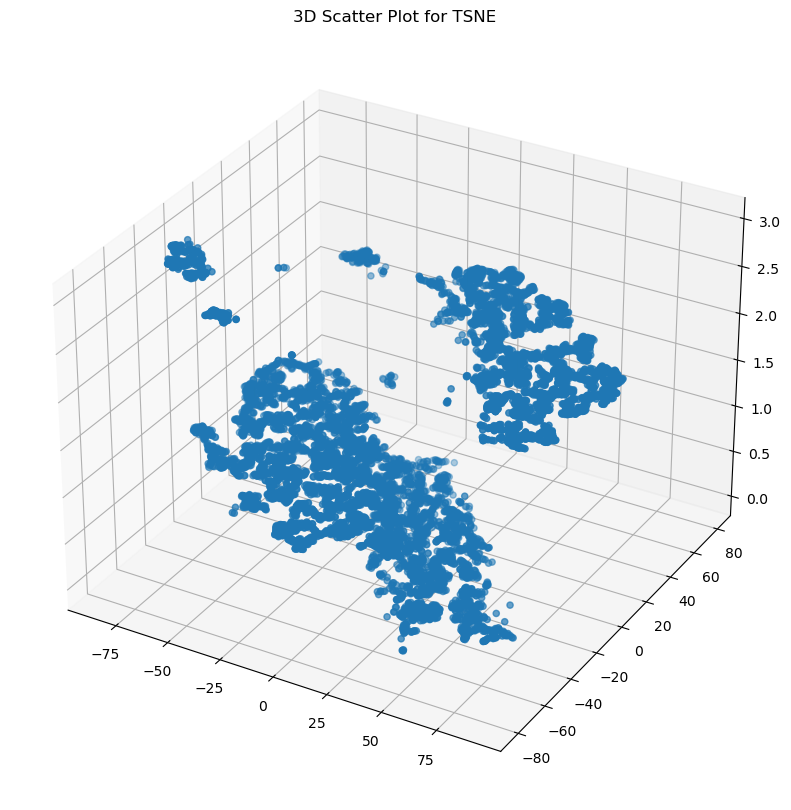

In [73]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

ax.scatter(tsne_X[:, 0], tsne_X[:, 1], y)
plt.title("3D Scatter Plot for TSNE")
plt.show()